In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import inv
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
%matplotlib inline

In [3]:
def metrics(y, y_pred, no_print=False):
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    if not no_print:
        print('R2:', r2)
        print('MSE:', mse)
    return r2, mse

#### Задание 1:
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [4]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x = zp
y = ks

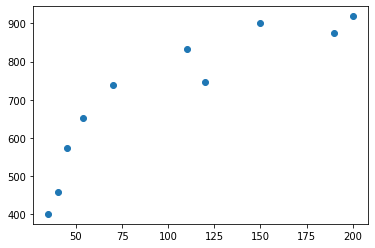

In [5]:
plt.scatter(x, y);

с интерсептом

In [6]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = np.mean(y) - b * np.mean(x)

In [7]:
y_hat = a + b*x

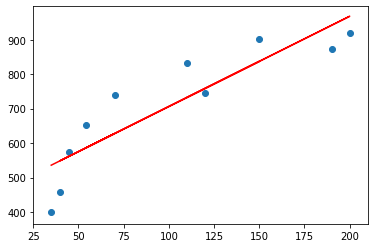

In [8]:
plt.plot(x, y_hat, color='red')
plt.scatter(x, y);

In [9]:
print(f'a: {a}, b: {b}')

a: 444.1773573243596, b: 2.620538882402765


In [10]:
metrics(y, y_hat)

R2: 0.7876386635293686
MSE: 6470.414201176658


(0.7876386635293686, 6470.414201176658)

без интерсепта

In [11]:
X = np.array(zp).reshape([10,1])
Y = np.array(ks).reshape([10,1])
B = inv(np.dot(X.T, X)).dot(X.T).dot(Y)
B

array([[5.88982042]])

In [12]:
y_hat = B[0][0]*x

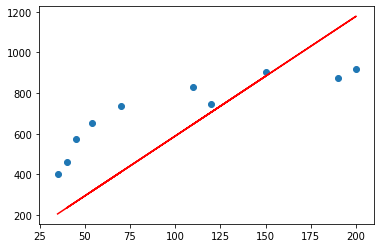

In [13]:
plt.plot(x, y_hat, color='red')
plt.scatter(x, y);

In [14]:
metrics(y, y_hat)

R2: -0.8549037531632888
MSE: 56516.85841571941


(-0.8549037531632888, 56516.85841571941)

без интерсепта метрики оч плохие.

#### Задание 2:
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [15]:
lr = 1/10**5
n = len(x)
B1_prev = 0
B1 = 1/10**5

while abs(B1_prev) < abs(B1):
    B1_prev = B1
    B1 -= lr*(2/n)*np.sum((B1*x-y)*x)
    
B1

5.889820420132688

Довольно точно совпало с значением, полученным в предыдущем задании, метрики соответствующие

#### Задание 3:
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

t-критерий используется в случае, если неизвестна дисперсия генеральной совокупности - известна лишь несмещенная оценка дисперсии.
Если известна дисперсия ГС - то Z-таблица

#### Задание 4:
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [16]:
lr = 1/10**5
n = len(x)
X = np.hstack([np.ones(10).reshape([n,1]), x.reshape([n,1])])

#### алгоритм "очень плохой, потому что я не понял, как вычислять B0"

In [17]:
B0_prev = 0
B1_prev = 0
B0 = 1/10**5
B1 = 1/10**5

while abs(B0_prev) < abs(B0) or abs(B1_prev) < abs(B1):
    B1_prev = B1
    B0_prev = B0
    B1 -= lr*(2/n)*np.sum((B0 + B1*x-y)*x)
    B0 -= lr*(2/n)*np.sum((B0 + B1*x-y)*x)
    
B0, B1

(4.244356962778216, 5.858580651537699)

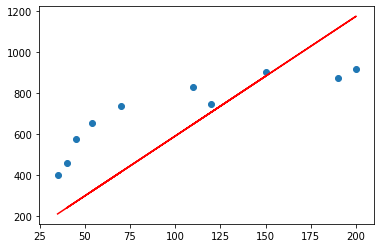

In [18]:
y_hat = B0 + B1*x
plt.plot(x, y_hat, color='red')
plt.scatter(x, y);

In [19]:
metrics(y, y_hat)

R2: -0.8236629534599382
MSE: 55564.98592604599


(-0.8236629534599382, 55564.98592604599)

#### алгоритм "ищем по r2 / сканер"

In [20]:
b0_range = np.arange(300, 500, 1) #оценочные границы интерсепта, определены по картинке
b1_range = np.arange(1, 4, 1/10) #оценочные границы b1
vals = []

for b0 in b0_range:
    for b1 in b1_range:
        y_h = b0 + b1*x
        r2, mse = metrics(y, y_h, True)
        vals.append([r2, b0, b1])

df = pd.DataFrame(vals, columns=['r2','b0','b1'])
df.sort_values(by='r2', ascending=False).head(1)

,r2,b0,b1
4396,0.787588,446,2.6


Лучшее значение коэффициэнтов (446, 2.6)

Для более точных значений нужно еще раз просканировать, с новыми границами коэфициэнтов в окрестностях полученных значений на предыдущем шаге. Если сразу поставить скорость обучения например на 1/10**5, как в предыдущих решениях, то ждать придется крайне долго. Поэтому изначально алгоритм назывался "тупой" =)

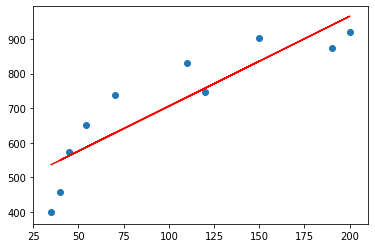

In [22]:
y_hat = 446 + 2.6*x
plt.plot(x, y_hat, color='red')
plt.scatter(x, y);